## Simple Fraud Analysis:
Idea: The behaviour of a person is affected by the people they are connected to.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
vertices = range(1,10)
edges= [(7,2), (2,3), (7,4), (4,5), (7,3), (7,5), (1,6),(1,7),(2,8),(2,9)]

In [3]:
G = nx.Graph()
G.add_nodes_from(vertices)
G.add_edges_from(edges)
pos=nx.spring_layout(G)

{1: Text(0.5385922124336946, 0.4979276832988612, '1 NF'),
 2: Text(-0.15943056357754767, -0.5221592851137448, '2 F'),
 3: Text(-0.275779631941614, -0.17721082488121345, '3 NF'),
 4: Text(-0.17134783440780801, 0.6723782779783906, '4 NF'),
 5: Text(-0.43838850527403134, 0.5208255789609146, '5 F'),
 6: Text(0.9769889870941184, 0.7658106868648563, '6 F'),
 7: Text(-0.04462737507258588, 0.18075211073142922, '7 F'),
 8: Text(0.07637795476696556, -0.9999999999999999, '8 NF'),
 9: Text(-0.5023852440211913, -0.9383242278394925, '9 NF')}

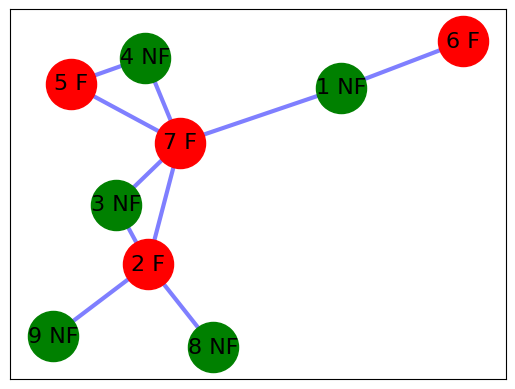

In [4]:
#Paint Non-Fraud Nodes as Green
nx.draw_networkx_nodes(
    G,
    pos, 
    nodelist=[1,4,3,8,9],
    node_color='g', 
    node_size=1300
)

#Paint Fraud Nodes as Red
nx.draw_networkx_nodes(
    G,
    pos, 
    nodelist=[2,5,6,7],
    node_color='r', 
    node_size=1300
)

#Draw the network with the respective labels
nx.draw_networkx_edges(G,pos,edges,width=3,alpha=0.5,edge_color='b' ) 
labels={
    1 : r'1 NF',
    2: r'2 F',
    3: r'3 NF',
    4: r'4 NF',
    5: r'5 F',
    6: r'6 F',
    7: r'7 F',
    8: r'8 NF',
    9: r'9 NF'
} 

nx.draw_networkx_labels(G,pos,labels,font_size=16)

## Analysing Fauds
Now the idea is the following. Now we have this graph where we know who is non-fraudulent and who is. The idea is by inserting a new person to the system, and by knowing who this person is connected to, we are able to determain if this person is Fraudulent or not.

### Equation:

$$ P(F|q) = {1 \over degree_{q}}  \sum_{n_{j} \in Neighbourhood_{n}|class(n_{j})=F}w(n,n_{j})DOS_{normalized_{j}}$$

#### Equation Description:
$ Neighbourhood_{n} $ - neighborhood of vertex n  
$ w(n,n_{j}) $ - weight of the connection between n and $ n_{j} $  
$ degree_{q} $ - Degree of node q  
$ DOS $ - Degree of Suspicion

### Example

$$ P(F|q) = { 1 + 1 \over 3 } = { 2 \over 3} = 0.67 $$

This means that this perticular person q has a probability of **67% to be fraudulent**. Now we simply have to define a treshhold where above that line, we classify that person as Fraudulent.

## More Complicated Example:
### The WatchTower:
The previous example has a couple of problems:
- It does not evaluate the importance of each vertex in the social network
- A connection to a hub that is involved in fraud may have different implications than a relationship with a remote, isolated person
- When labeling someone as a known case of fraud in an existing network, we do not consider the severity of the crime

### Severity of Crimes:
With this version, we are going to classify each crime with different severities, in the previous example, we classified every single crime as equal, but obviously there's different levels, as an example:

|  Negative outcome |  Negative outcome score |  
|---|---|
| Impersonation | 10 |
| Involvement in credit card theft | 8 |
| Fake check submission | 7 |
| Criminal record | 6 |
| No record | 0 |
